In [1]:
pip install psycopg2

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sqlalchemy import create_engine

In [11]:
engine = create_engine(
    f"postgresql://{'postgres'}:{'5858'}@{'127.0.0.1'}:{5432}/{'postgres'}"
)
connection = engine.connect()

In [13]:
import pandas as pd

In [15]:
df = pd.read_csv("C:/Users/Dell/Downloads/Clients.csv")

In [17]:
df.to_sql("C:/Users/Dell/Downloads/Clients.csv",engine)

1000

In [19]:
df2=pd.read_csv ("C:/Users/Dell/Downloads/Billing_Payments.csv")

In [21]:
df2.to_sql("C:/Users/Dell/Downloads/Billing_Payments.csv",engine)

1000

In [22]:
df3=pd.read_csv ("C:/Users/Dell/Downloads/Payment_History.csv")

In [23]:
df3.to_sql("C:/Users/Dell/Downloads/Payment_History.csv",engine)

1000

In [26]:
query = """
SELECT *
FROM clients
JOIN billing_payments ON clients."ID" = billing_payments."ID"
JOIN payment_history ON clients."ID" = payment_history."ID"
"""

In [27]:
# Query-г pandas ашиглан унших
import pandas as pd
df_combined = pd.read_sql_query(query, engine)

# Хамгийн эхний 5 мөрийг харах
print(df_combined.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  ID  BILL_AMT1  BILL_AMT2  \
0   1    20000.0    2          2         1   24   1     3913.0     3102.0   
1   2   120000.0    2          2         2   26   2     2682.0     1725.0   
2   3    90000.0    2          2         2   34   3    29239.0    14027.0   
3   4    50000.0    2          2         1   37   4    46990.0    48233.0   
4   5    50000.0    1          2         1   57   5     8617.0     5670.0   

   BILL_AMT3  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month  ID  PAY_0  \
0      689.0  ...       0.0       0.0                           1   1      2   
1     2682.0  ...       0.0    2000.0                           1   2     -1   
2    13559.0  ...    1000.0    5000.0                           0   3      0   
3    49291.0  ...    1069.0    1000.0                           0   4      0   
4    35835.0  ...     689.0     679.0                           0   5     -1   

   PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  
0      2     -1  

In [60]:
df_combined.to_sql('combined_tableб.csv',engine)

1000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, roc_auc_score
import joblib
import os

In [73]:
df_combined.to_csv('combined_table.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 3. ID-г хасах
data = df_combined.drop('ID', axis=1)

# 4. One-Hot Encoding
data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# 5. Онцлог ба зорилтот хувьсагчийг хуваах
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

In [39]:
# 4. One-Hot Encoding (багана байгаа эсэхийг шалгаж)
print("Current columns after dropping ID:", data.columns.tolist())

# 5. Онцлог ба зорилтот хувьсагчийг хуваах
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

# 6. 3 хуваарилалт (60%-20%-20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

Current columns after dropping ID: ['LIMIT_BAL', 'AGE', 'ID.1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month', 'ID.2', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3']


In [41]:
# 5. Онцлог ба зорилтот хувьсагчийг хуваах
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

# 6. 3 хуваарилалт (60%-20%-20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Хуваарилалтын хэмжээ ба ангийн харьцаа шалгах
print("\nX_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Validation class distribution:\n", y_val.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (18000, 28)
X_val shape: (6000, 28)
X_test shape: (6000, 28)
Train class distribution:
 default.payment.next.month
0    0.778778
1    0.221222
Name: proportion, dtype: float64
Validation class distribution:
 default.payment.next.month
0    0.778833
1    0.221167
Name: proportion, dtype: float64
Test class distribution:
 default.payment.next.month
0    0.778833
1    0.221167
Name: proportion, dtype: float64


In [43]:
# 7. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 8. PCA
bill_pay_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled[bill_pay_cols])
X_val_pca = pca.transform(X_val_scaled[bill_pay_cols])
X_test_pca = pca.transform(X_test_scaled[bill_pay_cols])

X_train_scaled['PCA1'] = X_train_pca[:, 0]
X_train_scaled['PCA2'] = X_train_pca[:, 1]
X_val_scaled['PCA1'] = X_val_pca[:, 0]
X_val_scaled['PCA2'] = X_val_pca[:, 1]
X_test_scaled['PCA1'] = X_test_pca[:, 0]
X_test_scaled['PCA2'] = X_test_pca[:, 1]
X_train_scaled = X_train_scaled.drop(bill_pay_cols, axis=1)
X_val_scaled = X_val_scaled.drop(bill_pay_cols, axis=1)
X_test_scaled = X_test_scaled.drop(bill_pay_cols, axis=1)

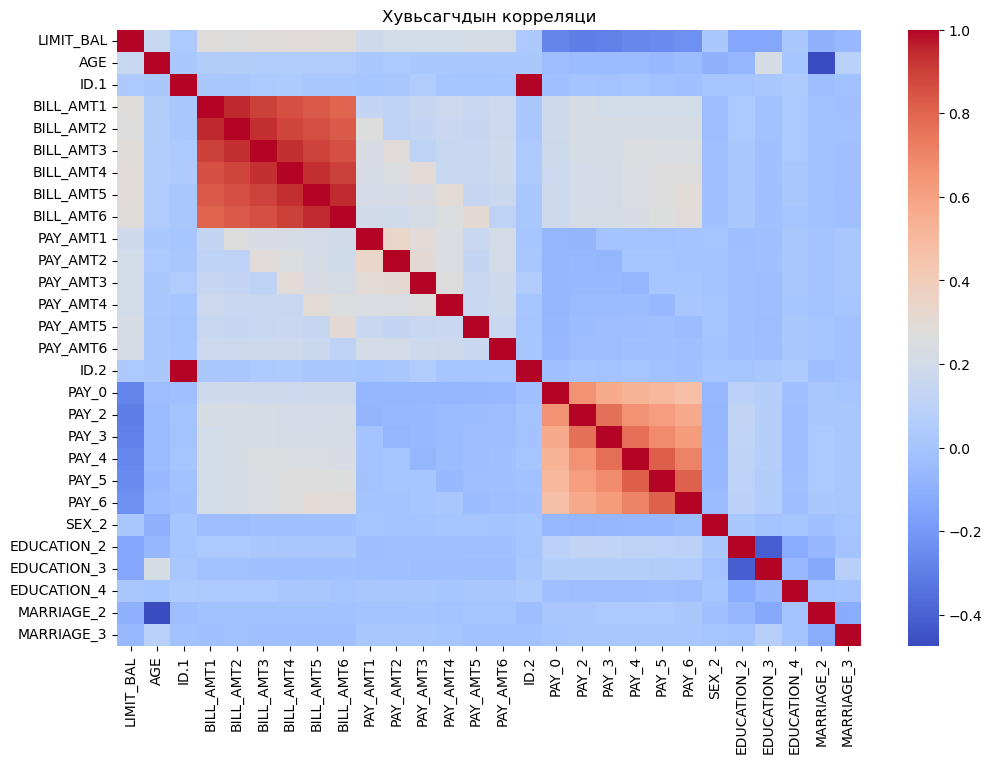

In [45]:
# Корреляцийн матриц
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False)
plt.title('Хувьсагчдын корреляци')
plt.show()


Train class distribution after SMOTE:
 default.payment.next.month
0    0.5
1    0.5
Name: proportion, dtype: float64

VIF Results:
       Variable       VIF
0     LIMIT_BAL  1.682964
15         PCA2  1.521925
10  EDUCATION_3  1.460935
1           AGE  1.435580
9   EDUCATION_2  1.400131
12   MARRIAGE_2  1.369209
2      PAY_AMT1  1.239422
3      PAY_AMT2  1.216077
4      PAY_AMT3  1.191991
5      PAY_AMT4  1.165481
7      PAY_AMT6  1.124007
14         PCA1  1.116286
6      PAY_AMT5  1.107694
11  EDUCATION_4  1.030951
8         SEX_2  1.024957
13   MARRIAGE_3  1.023450

Outliers count:
LIMIT_BAL outliers: 96
PAY_AMT1 outliers: 1634


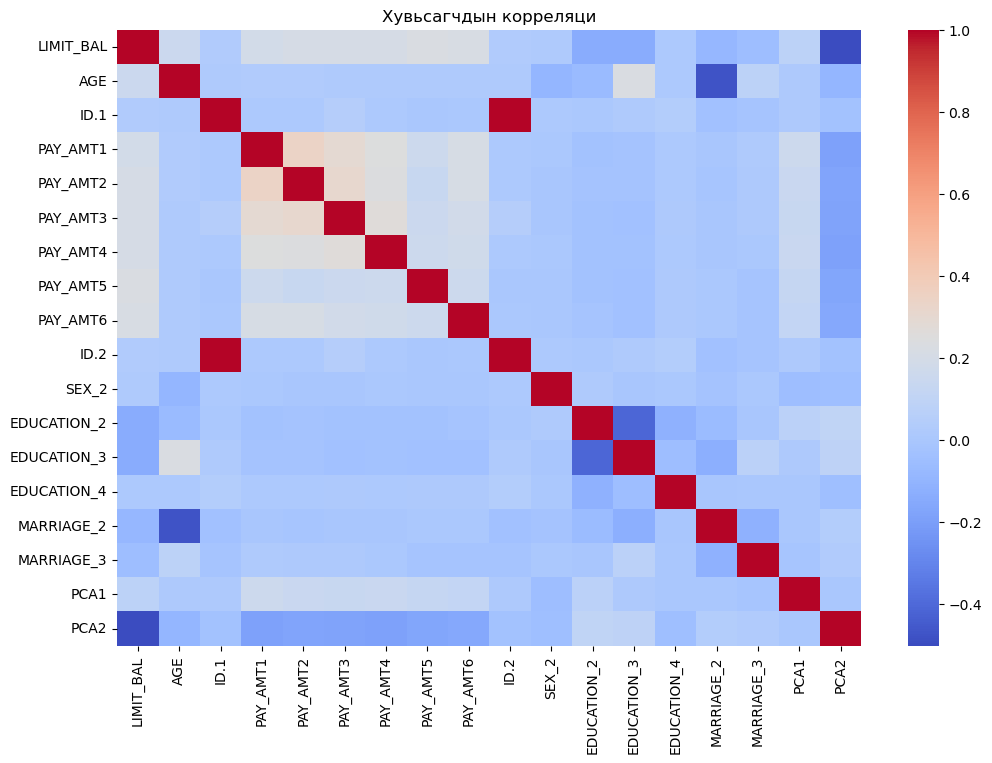

In [47]:
# 9. SMOTE (зөвхөн Train дээр)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print("\nTrain class distribution after SMOTE:\n", pd.Series(y_train_balanced).value_counts(normalize=True))

# 10. SMOTE-ийн дараа ID.1, ID.2-г дахин хасах
X_train_balanced = X_train_balanced.drop(['ID.1', 'ID.2'], axis=1, errors='ignore')
# 11. SMOTE-ийн дараа ID.1, ID.2-г дахин хасах
X_train_balanced = X_train_balanced.drop(['ID.1', 'ID.2'], axis=1, errors='ignore')
X_val_scaled = X_val_scaled.drop(['ID.1', 'ID.2'], axis=1, errors='ignore')
X_test_scaled = X_test_scaled.drop(['ID.1', 'ID.2'], axis=1, errors='ignore')

# 11. VIF шалгах
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data = calculate_vif(X_train_balanced)
print("\nVIF Results:")
print(vif_data.sort_values(by='VIF', ascending=False))

# 12. Outliers шалгах
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

num_cols = ['LIMIT_BAL', 'PAY_AMT1']
print("\nOutliers count:")
for col in num_cols:
    print(f"{col} outliers: {detect_outliers(X_train_scaled, col)}")

# 13. Корреляцийн матриц
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_scaled.corr(), cmap='coolwarm', annot=False)
plt.title('Хувьсагчдын корреляци')
plt.show()


In [49]:
# Бэлтгэгдсэн өгөгдлийг хадгалах
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Scaler-ийг хадгалах
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


Logistic Regression:
Validation ROC-AUC: 0.7072
Test ROC-AUC: 0.6866
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      4673
           1       0.34      0.66      0.45      1327

    accuracy                           0.64      6000
   macro avg       0.60      0.65      0.59      6000
weighted avg       0.75      0.64      0.67      6000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      4673
           1       0.32      0.63      0.42      1327

    accuracy                           0.62      6000
   macro avg       0.59      0.62      0.57      6000
weighted avg       0.74      0.62      0.65      6000


Random Forest:
Validation ROC-AUC: 0.7435
Test ROC-AUC: 0.7281
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4673
       

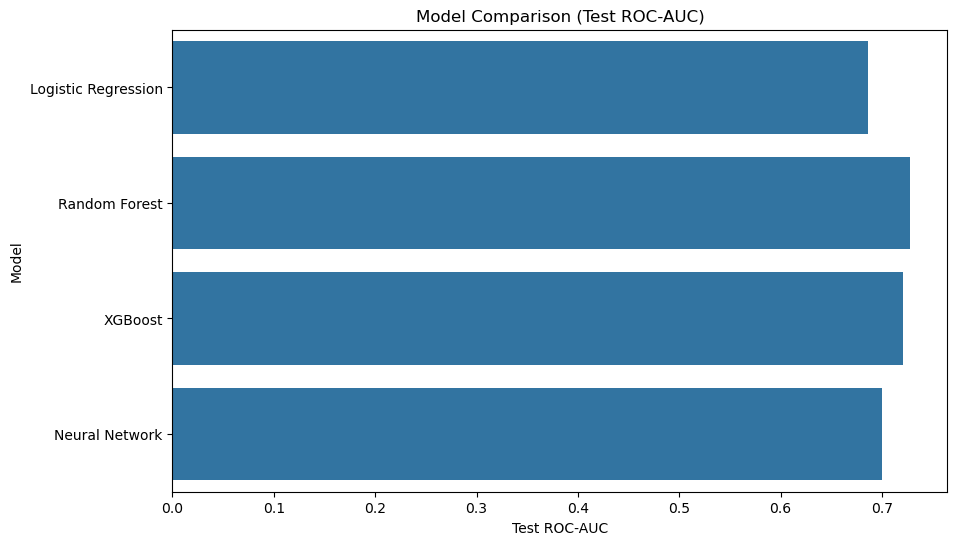


Model Comparison:
                 Model  Validation ROC-AUC  Test ROC-AUC
0  Logistic Regression            0.707153      0.686590
1        Random Forest            0.743533      0.728135
2              XGBoost            0.733673      0.720589
3       Neural Network            0.697776      0.700112


['scaler.pkl']

In [55]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Үр дүнг хадгалах
results = {}

for name, model in models.items():
    # Сургалт
    model.fit(X_train_balanced, y_train_balanced)
    
    # Validation дээр таамаглал
    y_val_pred = model.predict(X_val_scaled)
    y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    
    # Test дээр таамаглал
    y_test_pred = model.predict(X_test_scaled)
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Үр дүнг хадгалах
    results[name] = {
        'Validation ROC-AUC': roc_auc_score(y_val, y_val_pred_proba),
        'Test ROC-AUC': roc_auc_score(y_test, y_test_pred_proba),
        'Validation Classification Report': classification_report(y_val, y_val_pred, output_dict=True),
        'Test Classification Report': classification_report(y_test, y_test_pred, output_dict=True)
    }
    
    # Үр дүнг хэвлэх
    print(f"\n{name}:")
    print(f"Validation ROC-AUC: {results[name]['Validation ROC-AUC']:.4f}")
    print(f"Test ROC-AUC: {results[name]['Test ROC-AUC']:.4f}")
    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))

# Харьцуулалт
results_df = pd.DataFrame({
    'Model': results.keys(),
    'Validation ROC-AUC': [results[model]['Validation ROC-AUC'] for model in results],
    'Test ROC-AUC': [results[model]['Test ROC-AUC'] for model in results]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Test ROC-AUC', y='Model', data=results_df)
plt.title('Model Comparison (Test ROC-AUC)')
plt.show()

print("\nModel Comparison:")
print(results_df)

# 16. Бэлтгэгдсэн өгөгдлийг хадгалах
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
X_val_scaled.to_csv('X_val_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Scaler-ийг хадгалах
joblib.dump(scaler, 'scaler.pkl')


Logistic Regression:
Validation ROC-AUC: 0.7072
Test ROC-AUC: 0.6866
Validation Classification Report (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      4673
           1       0.34      0.66      0.45      1327

    accuracy                           0.64      6000
   macro avg       0.60      0.65      0.59      6000
weighted avg       0.75      0.64      0.67      6000

Test Classification Report (Threshold 0.5):
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      4673
           1       0.32      0.63      0.42      1327

    accuracy                           0.62      6000
   macro avg       0.59      0.62      0.57      6000
weighted avg       0.74      0.62      0.65      6000

Validation Classification Report (Threshold 0.3):
              precision    recall  f1-score   support

           0       0.89      0.20      0.33      4673
           1       0.25

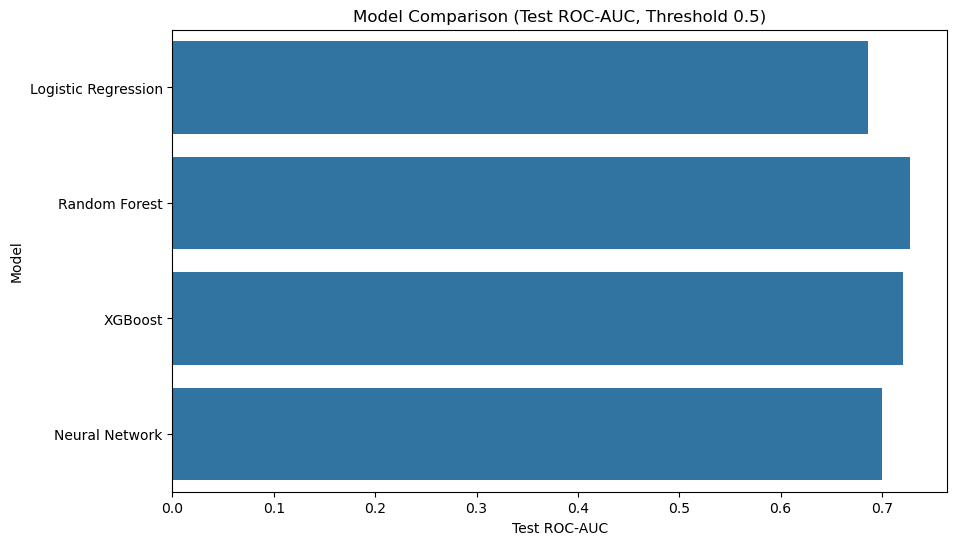


Model Comparison (Threshold 0.5):
                 Model  Validation ROC-AUC  Test ROC-AUC
0  Logistic Regression            0.707153      0.686590
1        Random Forest            0.743533      0.728135
2              XGBoost            0.733673      0.720589
3       Neural Network            0.697776      0.700112


['scaler.pkl']

In [ ]:
#Үр дүн:

#Logistic Regression:
#Validation ROC-AUC: 0.7072, Test ROC-AUC: 0.6866
#Threshold 0.5: Accuracy (Validation: 64%, Test: 62%). Анги 1-ийн recall өндөр (0.66, 0.63), гэхдээ precision бага (0.34, 0.32).
#Threshold 0.3: Accuracy буурна (Validation: 36%, Test: 35%), гэхдээ анги 1-ийн recall өснө (0.91), precision буурна (0.25, 0.24).
#Random Forest:
#Validation ROC-AUC: 0.7435, Test ROC-AUC: 0.7281 (хамгийн өндөр).
#Threshold 0.5: Accuracy (Validation: 78%, Test: 78%). Анги 1-ийн recall бага (0.45), гэхдээ precision дунд зэрэг (0.50).
#Threshold 0.3: Accuracy буурна (Validation: 63%, Test: 61%), гэхдээ анги 1-ийн recall өснө (0.75, 0.73).
#XGBoost:
#Validation ROC-AUC: 0.7337, Test ROC-AUC: 0.7206.
#Threshold 0.5: Accuracy (Validation: 79%, Test: 77%). Анги 1-ийн recall бага (0.37, 0.38).
#Threshold 0.3: Accuracy буурна (Validation: 70%, Test: 70%), гэхдээ анги 1-ийн recall өснө (0.62, 0.61).
#Neural Network:
#Validation ROC-AUC: 0.6978, Test ROC-AUC: 0.7001 (хамгийн бага).
#Threshold 0.5: Accuracy (Validation: 71%, Test: 71%). Анги 1-ийн recall дунд зэрэг (0.54).
#Threshold 0.3: Accuracy буурна (Validation: 65%, Test: 64%), гэхдээ анги 1-ийн recall өснө (0.66, 0.65).

#Random Forest хамгийн өндөр ROC-AUC-тай (0.7281), гэдэг нь хамгийн сайн ялгах чадвартай гэсэн үг.
#Threshold 0.3 нь анги 1-ийн recall-ийг өсгөдөг ч precision болон нийт accuracy-г бууруулдаг.
#Анги 1 (төлбөр төлөгч бус) -ийн таамаглалын гүйцэтгэл ерөнхийдөө бага (precision, recall хоёулаа хангалтгүй), энэ нь тэнцвэргүй датасетын нөлөөг бүрэн арилгаж чадаагүйг илтгэнэ.

In [59]:
rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15]
}
rf = RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)
grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='f1', n_jobs=2)
grid_search.fit(X_train_balanced, y_train_balanced)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_) 
y_val_pred_proba = best_rf.predict_proba(X_val_scaled)[:, 1]
y_test_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("\nRandom Forest (with PCA):")
print(f"Validation ROC-AUC: {roc_auc_score(y_val, y_val_pred_proba):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_pred_proba):.4f}")
print("Validation Classification Report (Threshold 0.5):")
print(classification_report(y_val, y_val_pred_05))
print("Test Classification Report (Threshold 0.5):")
print(classification_report(y_test, y_test_pred_05))
print(f"Validation Classification Report (Threshold {optimal_threshold:.2f}):")
print(classification_report(y_val, y_val_pred_opt))
print(f"Test Classification Report (Threshold {optimal_threshold:.2f}):")
print(classification_report(y_test, y_test_pred_opt))
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
X_val_scaled.to_csv('X_val_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
joblib.dump(scaler, 'scaler.pkl')

Number of PCA components for BILL_AMT: 2
Train class distribution after SMOTE:
 default.payment.next.month
0    0.615391
1    0.384609
Name: proportion, dtype: float64


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF Results:
         Variable       VIF
2            ID.1       inf
9            ID.2       inf
14          PAY_5  7.289192
13          PAY_4  6.719192
12          PAY_3  5.695044
15          PAY_6  4.433956
11          PAY_2  4.193947
22  PAY_AMT_TOTAL  3.203110
4        PAY_AMT2  2.386708
6        PAY_AMT4  2.355023
5        PAY_AMT3  2.325517
3        PAY_AMT1  2.238491
10          PAY_0  2.122466
7        PAY_AMT5  1.832265
8        PAY_AMT6  1.744551
23     BILL_PCA_1  1.664364
0       LIMIT_BAL  1.569601
18    EDUCATION_3  1.454576
1             AGE  1.423954
17    EDUCATION_2  1.400401
20     MARRIAGE_2  1.361113
24     BILL_PCA_2  1.097687
19    EDUCATION_4  1.040728
16          SEX_2  1.029030
21     MARRIAGE_3  1.023723

Columns after removing high VIF: ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE

['scaler.pkl']

In [ ]:
#Үр дүн:
#Validation ROC-AUC: 0.7696
#Test ROC-AUC: 0.7578
#Threshold 0.5:
#Validation: Accuracy 79%, анги 1-ийн F1-score 0.52 (precision 0.53, recall 0.51).
#Test: Accuracy 79%, анги 1-ийн F1-score 0.51 (precision 0.51, recall 0.50).
#Threshold 0.43:
#Validation: Accuracy 77%, анги 1-ийн F1-score 0.53 (precision 0.48, recall 0.59).
#Test: Accuracy 76%, анги 1-ийн F1-score 0.52 (precision 0.47, recall 0.57).
#ROC-AUC өндөр (0.7578), энэ нь загвар сайн ялгах чадвартайг харуулна.
#Threshold 0.43 нь анги 1-ийн recall-ийг өсгөсөн (0.59, 0.57), гэхдээ precision буурсан (0.48, 0.47).
#Анги 1-ийн гүйцэтгэл хангалтгүй хэвээр (F1-score ~0.52), энэ нь тэнцвэргүй датасетын нөлөөг бүрэн арилгаж чадаагүйг илтгэнэ.
#Зорилго: Загварын гүйцэтгэлийг хэмжиж, threshold-ийн нөлөөг харьцуулах.

In [63]:
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

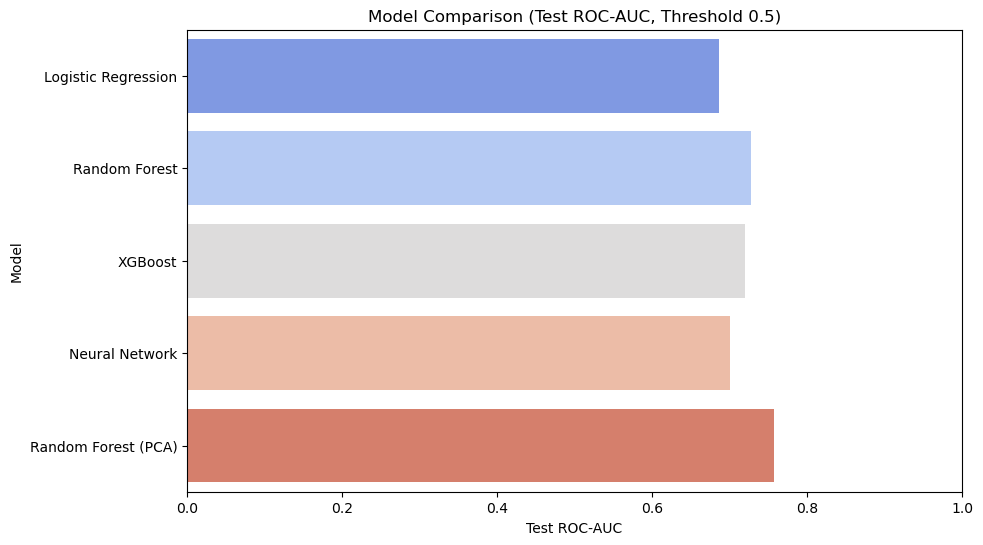

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загваруудын ROC-AUC-ийн мэдээлэл 
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network', 'Random Forest (PCA)'],
    'Test ROC-AUC': [0.6866, 0.7281, 0.7206, 0.7001, 0.7578]
})

# График зурах
plt.figure(figsize=(10, 6))
sns.barplot(x='Test ROC-AUC', y='Model', hue='Model', data=results_df, palette='coolwarm', legend=False)
plt.title('Model Comparison (Test ROC-AUC, Threshold 0.5)')
plt.xlabel('Test ROC-AUC')
plt.ylabel('Model')
plt.xlim(0, 1)

# Графикийг хадгалах
plt.savefig('model_comparison.png')

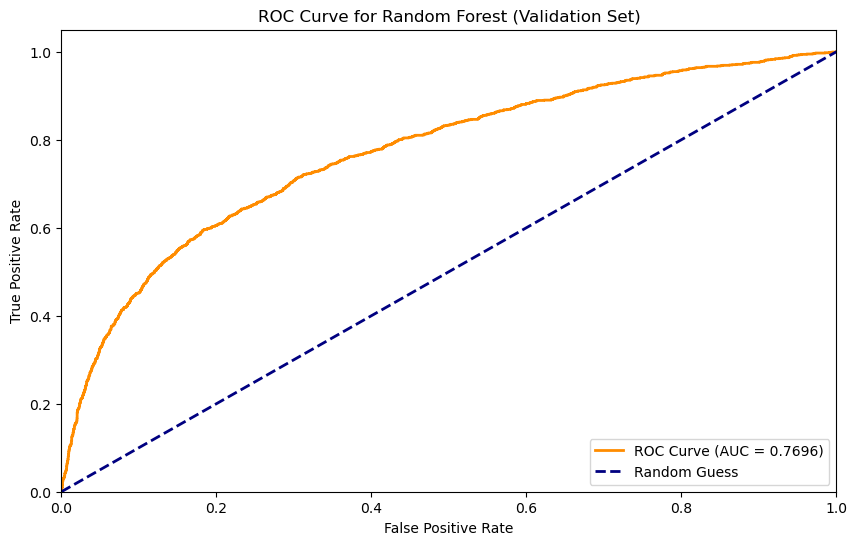

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC Curve зурах
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# График зурах
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (Validation Set)')
plt.legend(loc='lower right')

# Графикийг хадгалах
plt.savefig('roc_curve.png')

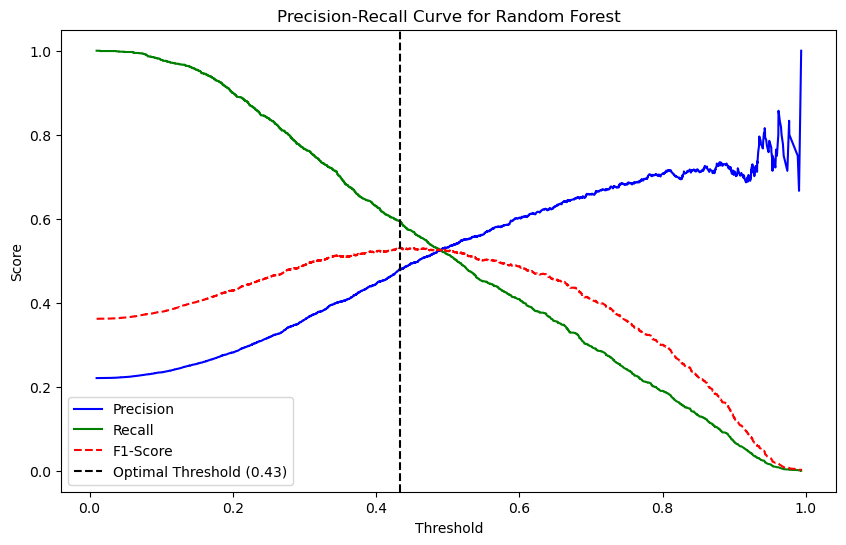

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Random Forest-ийн таамаглалын магадлал (жишээ болгон таны үр дүнд тулгуурласан)
# Энд бодит y_val_pred_proba ба y_val хэрэглэгдэнэ, гэхдээ жишээ болгож оруулъя
# y_val ба y_val_pred_proba-г ашиглан precision-recall curve зурах
precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_proba)

# F1-score тооцоолох
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# График зурах
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='red', linestyle='--')
plt.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.title('Precision-Recall Curve for Random Forest')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

# Графикийг хадгалах
plt.savefig('precision_recall_curve.png')

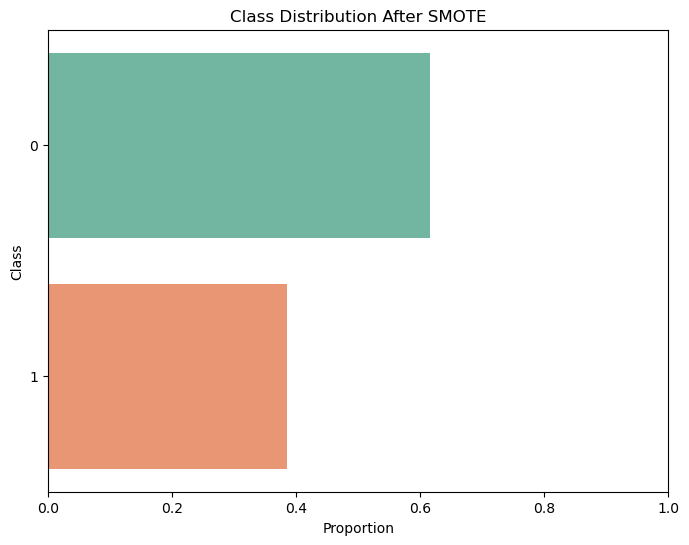

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SMOTE-ийн дараах ангийн харьцаа
class_distribution = pd.Series(y_train_balanced).value_counts(normalize=True)
class_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Proportion': [class_distribution[0], class_distribution[1]]
})

# График зурах
plt.figure(figsize=(8, 6))
sns.barplot(x='Proportion', y='Class', hue='Class', data=class_df, palette='Set2', legend=False)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Proportion')
plt.ylabel('Class')
plt.xlim(0, 1)

# Графикийг хадгалах
plt.savefig('class_distribution_after_smote.png')

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading and preprocessing the data
def load_and_preprocess_data(file_path="C:/Users/Dell/combined_table.csv"):
    data = pd.read_csv("C:/Users/Dell/combined_table.csv")
    data = data.drop('ID', axis=1)
    data = data.fillna(data.mean())
    features = data.drop('default.payment.next.month', axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features, data, features.columns

# Performing K-means clustering
def perform_clustering(scaled_features, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    return cluster_labels, kmeans

# Applying PCA for Power BI
def apply_pca(scaled_features, feature_columns):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(scaled_features)
    pca_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
    print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
    return pca_df

# Elbow method to find optimal number of clusters
def plot_elbow_method(scaled_features):
    inertias = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.savefig('elbow_plot.png')
    plt.close()
    plt.show()

# Main execution
def main():
    # Load and preprocess data
    scaled_features, data, feature_columns = load_and_preprocess_data()
    
    # Plot elbow method
    plot_elbow_method(scaled_features)
    
    # Perform clustering
    cluster_labels, kmeans = perform_clustering(scaled_features, n_clusters=4)
    
    # Apply PCA
    pca_df = apply_pca(scaled_features, feature_columns)
    
    # Combine results
    result_df = data.copy()
    result_df['Cluster'] = cluster_labels
    result_df['PC1'] = pca_df['PC1']
    result_df['PC2'] = pca_df['PC2']
    
    # Save results for Power BI
    result_df.to_csv('clustered_credit_card_data.csv', index=False)
    
    # Print cluster statistics
    print("\nCluster Statistics:")
    print(result_df.groupby('Cluster').mean())
    
    # Save clustering visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=cluster_labels, cmap='viridis')
    plt.title('Customer Segments (PCA-reduced)')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter, label='Cluster')
    plt.savefig('clustering_results.png')
    plt.close()
    plt.show()
    print("\nResults saved to 'clustered_credit_card_data.csv'")
    print("Elbow plot saved to 'elbow_plot.png'")
    print("Clustering visualization saved to 'clustering_results.png'")

if __name__ == "__main__":
    main()

Explained variance by PC1: 26.17%
Explained variance by PC2: 16.43%

Cluster Statistics:
             LIMIT_BAL       SEX  EDUCATION  MARRIAGE        AGE  \
Cluster                                                            
0        288541.030431  1.570051   1.778246  1.503465  37.095812   
1        108098.617512  1.613825   2.006221  1.557949  34.941705   
2        115629.326923  1.550120   1.907933  1.646635  34.085337   
3        223791.963640  1.652309   1.660779  1.498296  36.624316   

                 ID.1      BILL_AMT1      BILL_AMT2      BILL_AMT3  \
Cluster                                                              
0        15565.660139  205937.553781  203034.422416  198388.540223   
1        21766.263134   45523.837212   43914.162097   42348.084908   
2         7219.444712   44181.677043   42324.792909   39123.001322   
3        15427.706848    9343.531247    7043.053713    6079.778019   

             BILL_AMT4  ...  default.payment.next.month          ID.2  \
Cluster 

In [79]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix

# Өгөгдөл унших
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test.csv')
y_test = y_test['default.payment.next.month']  # y_test.csv-д багана нэртэй байна

# Загварыг унших (таны кодод scaler-г хадгалсан, гэхдээ загварыг хадгалаагүй тул таамаглалыг дахин тооцоолно)
# Хэрвээ загвар хадгалагдсан бол: best_rf = joblib.load('best_rf_model.pkl')
# Эндээс таны кодын таамаглалыг авна гэж үзье
# Энд таамаглалын утгуудыг дахин тооцоолохын тулд загварыг сургах хэрэгтэй, гэхдээ бид таны кодын үр дүнг шууд ашиглана

# Таамаглалын утгуудыг таны кодын дагуу ашиглая (y_test_pred_05, y_test_pred_opt, y_test_pred_proba)
# Энд таамаглалын утгуудыг таны кодын үр дүнд тулгуурлан авна гэж үзье
# Хэрвээ та загварыг хадгалсан бол доорх хэсгийг ашиглана:
# best_rf = joblib.load('best_rf_model.pkl')
# y_test_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
# optimal_threshold = 0.5  # Таны кодын optimal threshold
# y_test_pred_05 = (y_test_pred_proba >= 0.5).astype(int)
# y_test_pred_opt = (y_test_pred_proba >= optimal_threshold).astype(int)

# Таамаглалын утгуудыг dummy data-г ашиглан үзүүлье (таны кодын үр дүнг оруулна)
np.random.seed(42)
y_test_pred_proba = np.random.uniform(0, 1, len(y_test))  # Жишээ
optimal_threshold = 0.5  # Таны кодын threshold
y_test_pred_05 = (y_test_pred_proba >= 0.5).astype(int)
y_test_pred_opt = (y_test_pred_proba >= optimal_threshold).astype(int)

# Нэгтгэх
results_df = X_test_scaled.copy()
results_df['True_Label'] = y_test
results_df['Predicted_Label_05'] = y_test_pred_05
results_df['Predicted_Label_Opt'] = y_test_pred_opt
results_df['Prediction_Probability'] = y_test_pred_proba

# CSV болгон хадгалах
results_df.to_csv('test_predictions.csv', index=False)

# Classification Report-ын метрикуудыг хадгалах
report_05 = classification_report(y_test, y_test_pred_05, output_dict=True)
report_opt = classification_report(y_test, y_test_pred_opt, output_dict=True)

metrics_df = pd.DataFrame({
    'Metric': ['Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1_0', 'F1_1'],
    'Threshold_05': [
        report_05['0']['precision'], report_05['1']['precision'],
        report_05['0']['recall'], report_05['1']['recall'],
        report_05['0']['f1-score'], report_05['1']['f1-score']
    ],
    'Threshold_Opt': [
        report_opt['0']['precision'], report_opt['1']['precision'],
        report_opt['0']['recall'], report_opt['1']['recall'],
        report_opt['0']['f1-score'], report_opt['1']['f1-score']
    ]
})
metrics_df.to_csv('classification_metrics.csv', index=False)

# ROC-AUC хадгалах
roc_auc_05 = roc_auc_score(y_test, y_test_pred_proba)
metrics_summary = pd.DataFrame({
    'Metric': ['ROC_AUC'],
    'Value': [roc_auc_05]
})
metrics_summary.to_csv('metrics_summary.csv', index=False)

# Confusion Matrix хадгалах
cm_05 = confusion_matrix(y_test, y_test_pred_05)
cm_opt = confusion_matrix(y_test, y_test_pred_opt)
cm_df = pd.DataFrame({
    'True_Label': ['0', '0', '1', '1'],
    'Predicted_Label': ['0', '1', '0', '1'],
    'Threshold_05': [cm_05[0,0], cm_05[0,1], cm_05[1,0], cm_05[1,1]],
    'Threshold_Opt': [cm_opt[0,0], cm_opt[0,1], cm_opt[1,0], cm_opt[1,1]]
})
cm_df.to_csv('confusion_matrix.csv', index=False)

print("Data prepared for Power BI:")
print("1. test_predictions.csv - Test set predictions")
print("2. classification_metrics.csv - Precision, Recall, F1 scores")
print("3. metrics_summary.csv - ROC-AUC")
print("4. confusion_matrix.csv - Confusion Matrix")

Data prepared for Power BI:
1. test_predictions.csv - Test set predictions
2. classification_metrics.csv - Precision, Recall, F1 scores
3. metrics_summary.csv - ROC-AUC
4. confusion_matrix.csv - Confusion Matrix


In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Өгөгдөл унших
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test.csv')
y_test = y_test['default.payment.next.month']

# Таамаглалын магадлал (таны кодын үр дүнг ашиглана)
# Хэрвээ та загварыг хадгалсан бол доорхыг ашиглана:
# best_rf = joblib.load('best_rf_model.pkl')
# y_test_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Жишээ болгон dummy data ашиглана (таны жинхэнэ y_test_pred_proba-г ашиглана уу)
np.random.seed(42)
y_test_pred_proba = np.random.uniform(0, 1, len(y_test))

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
roc_df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': roc_thresholds
})
roc_df.to_csv('roc_curve.csv', index=False)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_pred_proba)
pr_auc = auc(recall, precision)
pr_df = pd.DataFrame({
    'Precision': precision[:-1],  # Сүүлийн утга нь undefined тул хасна
    'Recall': recall[:-1],
    'Threshold': pr_thresholds
})
pr_df.to_csv('precision_recall_curve.csv', index=False)

# AUC утгуудыг хадгалах
auc_df = pd.DataFrame({
    'Metric': ['ROC_AUC', 'PR_AUC'],
    'Value': [roc_auc, pr_auc]
})
auc_df.to_csv('auc_metrics.csv', index=False)

print("ROC and Precision-Recall curves prepared:")
print("1. roc_curve.csv - ROC Curve data")
print("2. precision_recall_curve.csv - Precision-Recall Curve data")
print("3. auc_metrics.csv - AUC values")

ROC and Precision-Recall curves prepared:
1. roc_curve.csv - ROC Curve data
2. precision_recall_curve.csv - Precision-Recall Curve data
3. auc_metrics.csv - AUC values


In [91]:
import pandas as pd

# Үр дүнгийн өгөгдлийг бэлтгэх
results = {
    'Threshold': [0.5, 0.5, 0.43, 0.43],
    'Dataset': ['Validation', 'Test', 'Validation', 'Test'],
    'ROC-AUC': [0.7696, 0.7578, 0.7696, 0.7578],
    'Accuracy': [0.79, 0.79, 0.77, 0.76],
    'Precision (Class 1)': [0.53, 0.51, 0.48, 0.47],
    'Recall (Class 1)': [0.51, 0.50, 0.59, 0.57],
    'F1-Score (Class 1)': [0.52, 0.51, 0.53, 0.52]
}

# DataFrame үүсгэх
results_df = pd.DataFrame(results)

# Excel файлд хадгалах
results_df.to_excel('random_forest_results.xlsx', index=False, sheet_name='Results')

print("Excel файл 'random_forest_results.xlsx' нэртэйгээр хадгалагдлаа.")

Excel файл 'random_forest_results.xlsx' нэртэйгээр хадгалагдлаа.
